In [2]:
import pandas as pd
import numpy as np
from benchmarks import *
import glob
import os, sys
import seaborn as sns
import matplotlib.pyplot as plt

ROOT_DIR /usr/WS2/bolet1/lassen-benchmarks/exploreHyperparams


In [3]:
# for each of the programs/prob sizes in the explorData directory,
# load up all their CSV data

os.chdir(ROOT_DIR+'/explorData')

# extract the names and problem sizes of the done codes
dirs = list(os.listdir())

dirs.sort()

doneRuns = {}

for dir in dirs:
	progname = dir.split('-')[0]
	probsize = dir.split('-')[1]

	allJobs = glob.glob('./'+dir+'/allUniquePointsToSample.csv')[0]
	doneFiles = glob.glob('./'+dir+'/*/complete.csv')

	allData = pd.read_csv(allJobs)

	doneData = pd.DataFrame(columns=['xtime']+list(allData.columns))

	# join all the done files into one csv
	for doneFile in doneFiles:
		comp = pd.read_csv(doneFile)
		doneData = pd.concat([doneData, comp], ignore_index=True)

	doneData = doneData.reset_index(drop=True)

	# we remove this line just to get the plots up
	doneData = doneData[doneData['xtime'] != -1.0]

	# if we have all the data, let's analyze it
	if doneData.shape[0] == allData.shape[0]:
		print(progname, probsize, end='\t')
		print(doneData.shape, allData.shape, 'all samples collected!')
		doneRuns[dir] = {'progname':progname, 'probsize': probsize, 'df':doneData}
	else:
		print('\t', progname, probsize, end='\t')
		print('incomplete data! Collected', doneData.shape[0], '/', allData.shape[0], 'samples')





bfs_rodinia lrgprob	(3564, 7) (3564, 6) all samples collected!
bfs_rodinia medprob	(3564, 7) (3564, 6) all samples collected!
bfs_rodinia smlprob	(3564, 7) (3564, 6) all samples collected!
bt_nas lrgprob	(3564, 7) (3564, 6) all samples collected!
bt_nas medprob	(3564, 7) (3564, 6) all samples collected!
bt_nas smlprob	(3564, 7) (3564, 6) all samples collected!
cfd_rodinia lrgprob	(3564, 7) (3564, 6) all samples collected!
cfd_rodinia medprob	(3564, 7) (3564, 6) all samples collected!
cfd_rodinia smlprob	(3564, 7) (3564, 6) all samples collected!
cg_nas lrgprob	(3564, 7) (3564, 6) all samples collected!
cg_nas medprob	(3564, 7) (3564, 6) all samples collected!
cg_nas smlprob	(3564, 7) (3564, 6) all samples collected!
ft_nas lrgprob	(3564, 7) (3564, 6) all samples collected!
ft_nas medprob	(3564, 7) (3564, 6) all samples collected!
ft_nas smlprob	(3564, 7) (3564, 6) all samples collected!
hpcg lrgprob	(3564, 7) (3564, 6) all samples collected!
hpcg medprob	(3564, 7) (3564, 6) all samples

bfs_rodinia lrgprob
best xtimes
   OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE     xtime
0               20         close      cores     guided,8  0.027668
1               20         close      cores    guided,64  0.027958
2               20         close      cores     guided,1  0.028032
3               20         close      cores       static  0.028066
4               20         close      cores   guided,512  0.028919
5               20        spread    threads     guided,8  0.028960
6               20         close      cores    guided,32  0.029336
7               20        spread    threads   guided,256  0.029341
8               20        spread    threads       static  0.029354
9               20         close      cores   static,512  0.029374
worst xtimes
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE     xtime
1178               60         close    sockets    dynamic,1  1.966099
1179              160        spread    sockets    dynamic,1  2.062070
1180    

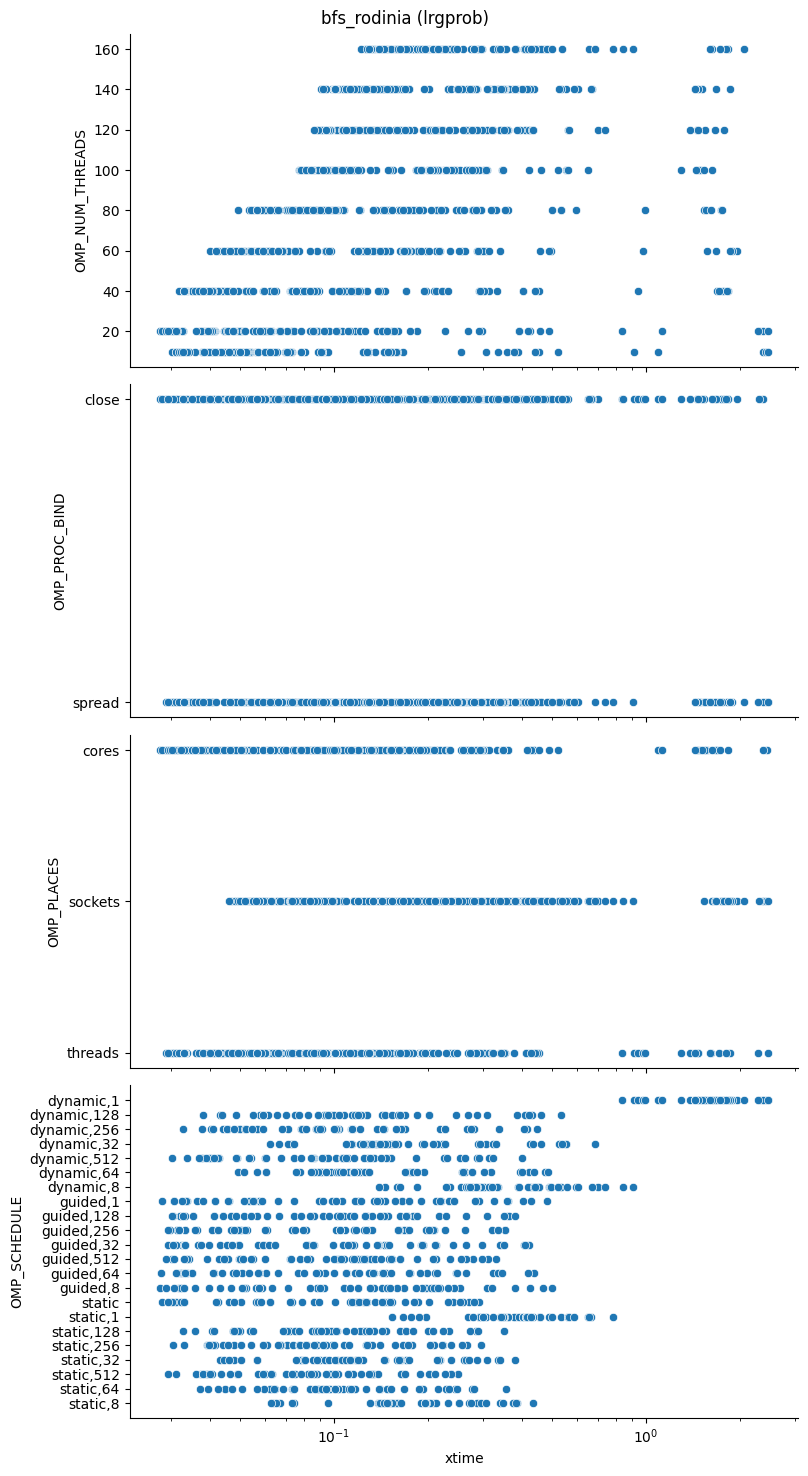

bfs_rodinia medprob
best xtimes
   OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE     xtime
0               10        spread    threads    guided,64  0.019645
1               10         close      cores     guided,1  0.019768
2               10         close      cores   guided,512  0.019791
3               10         close      cores   guided,256  0.019939
4               10        spread    threads   static,512  0.019983
5               10        spread    threads   static,256  0.020241
6               10        spread    threads   guided,128  0.020251
7               10        spread    threads     guided,1  0.020347
8               10        spread    threads   guided,512  0.020403
9               10         close    threads       static  0.020517
worst xtimes
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE     xtime
1178              160        spread    sockets     guided,1  0.361397
1179              120        spread    sockets    dynamic,1  0.382965
1180    

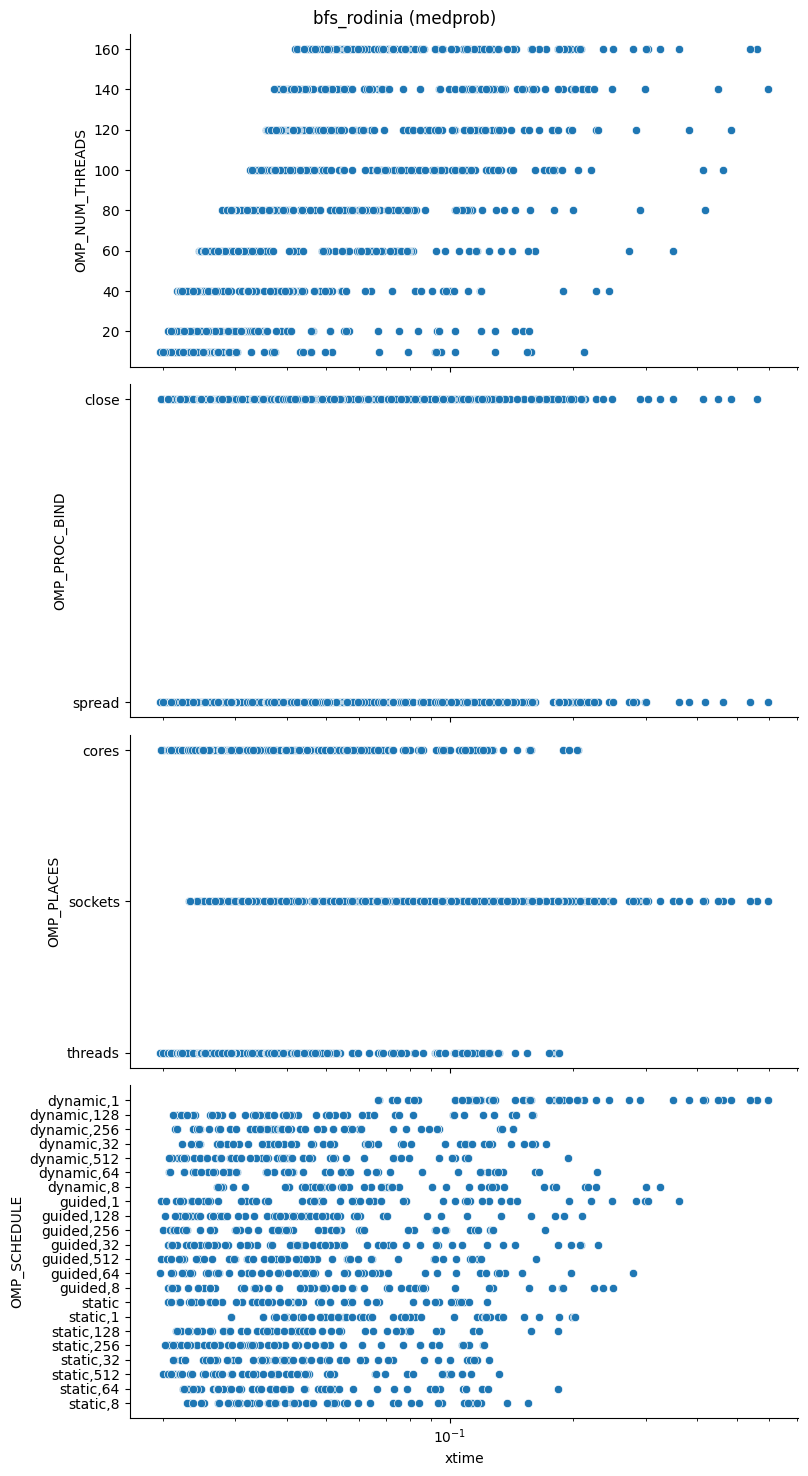

bfs_rodinia smlprob
best xtimes
   OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE     xtime
0               10         close    threads       static  0.018126
1               10         close    threads   static,128  0.018227
2               10         close    threads    static,64  0.018350
3               10         close    threads   static,256  0.018388
4               10         close    threads    guided,64  0.018408
5               10         close    threads   static,512  0.018424
6               10         close    threads     guided,8  0.018433
7               10         close    threads    static,32  0.018527
8               10        spread    threads   static,128  0.018533
9               10         close    threads     static,8  0.018574
worst xtimes
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE     xtime
1178              140        spread    sockets     guided,8  0.169876
1179              140         close    sockets       static  0.173760
1180    

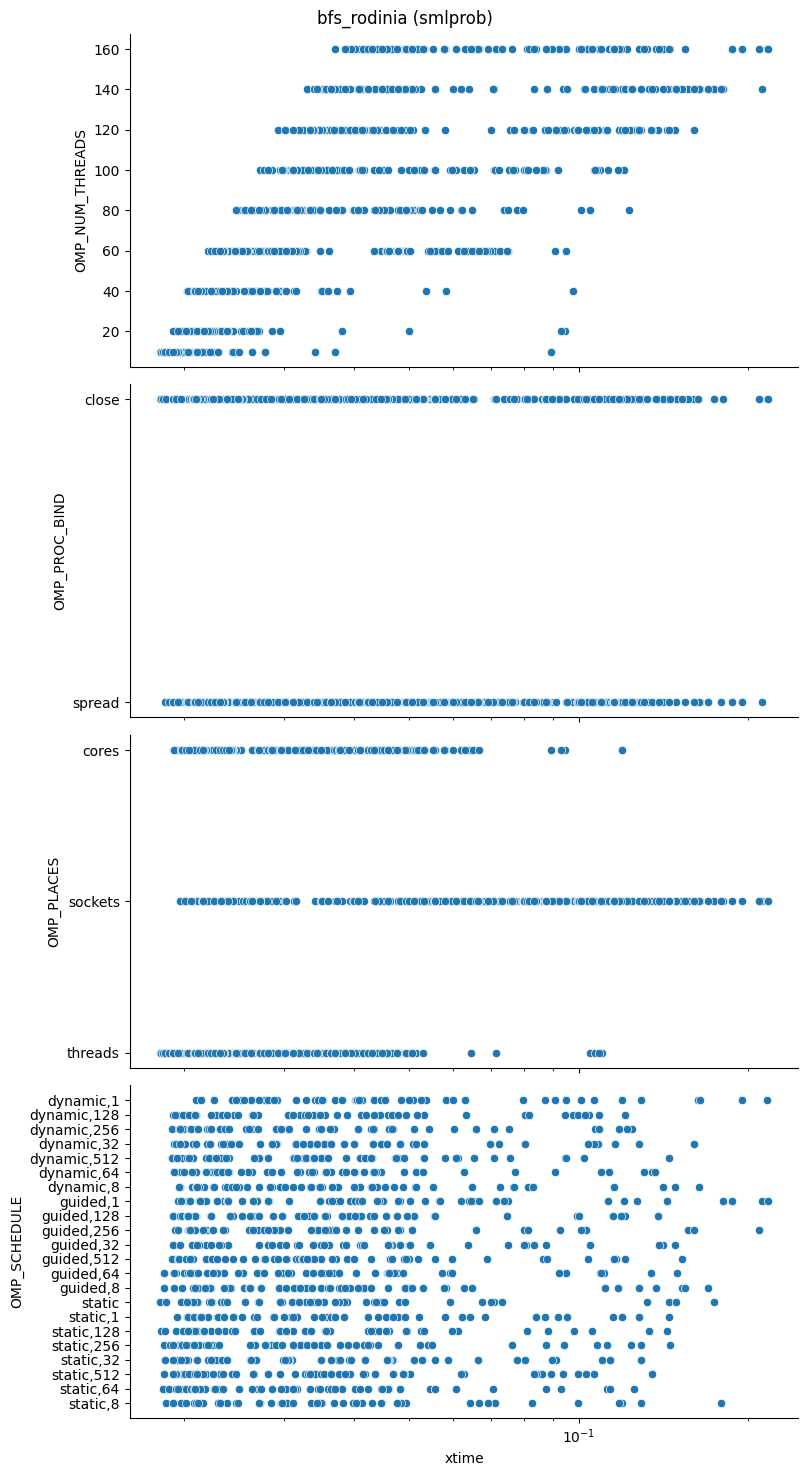

bt_nas lrgprob
best xtimes
   OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE       xtime
0              140        spread      cores     guided,1  796.513333
1              140         close      cores     guided,1  799.663333
2              140        spread      cores    dynamic,1  809.403333
3              140         close      cores    dynamic,1  811.953333
4              140        spread    threads    dynamic,1  818.413333
5               60        spread    threads    dynamic,1  821.843333
6              140        spread    threads     guided,1  834.863333
7               60        spread    threads     guided,1  836.680000
8              140         close    threads     guided,1  839.136667
9              140         close    threads    dynamic,1  842.063333
worst xtimes
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE        xtime
1178              160        spread    threads   guided,128  7536.950000
1179              140        spread    threads   guided

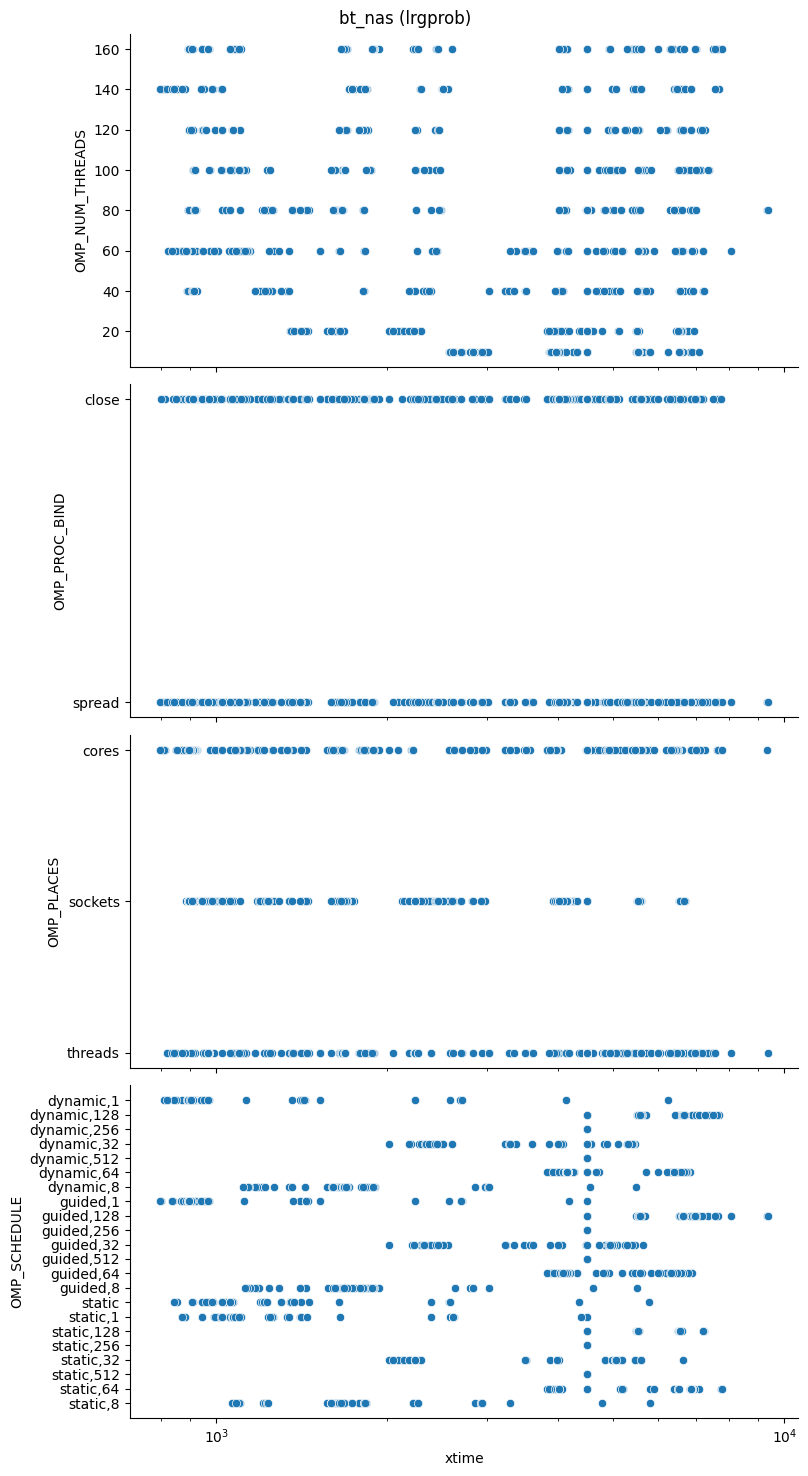

bt_nas medprob
best xtimes
   OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE      xtime
0               60        spread    threads    dynamic,1  44.653333
1               60        spread    threads     guided,1  44.746667
2               60        spread      cores    dynamic,1  45.436667
3               60         close      cores     guided,1  45.560000
4               60         close      cores    dynamic,1  45.746667
5               60        spread      cores     guided,1  45.763333
6               40        spread    sockets     guided,1  46.876667
7               40         close    sockets    dynamic,1  47.140000
8               40        spread    threads     guided,1  47.613333
9               40        spread      cores     guided,1  48.026667
worst xtimes
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE        xtime
1178              140         close    threads   guided,512  1257.456667
1179              160        spread    threads  dynamic,512  1257.

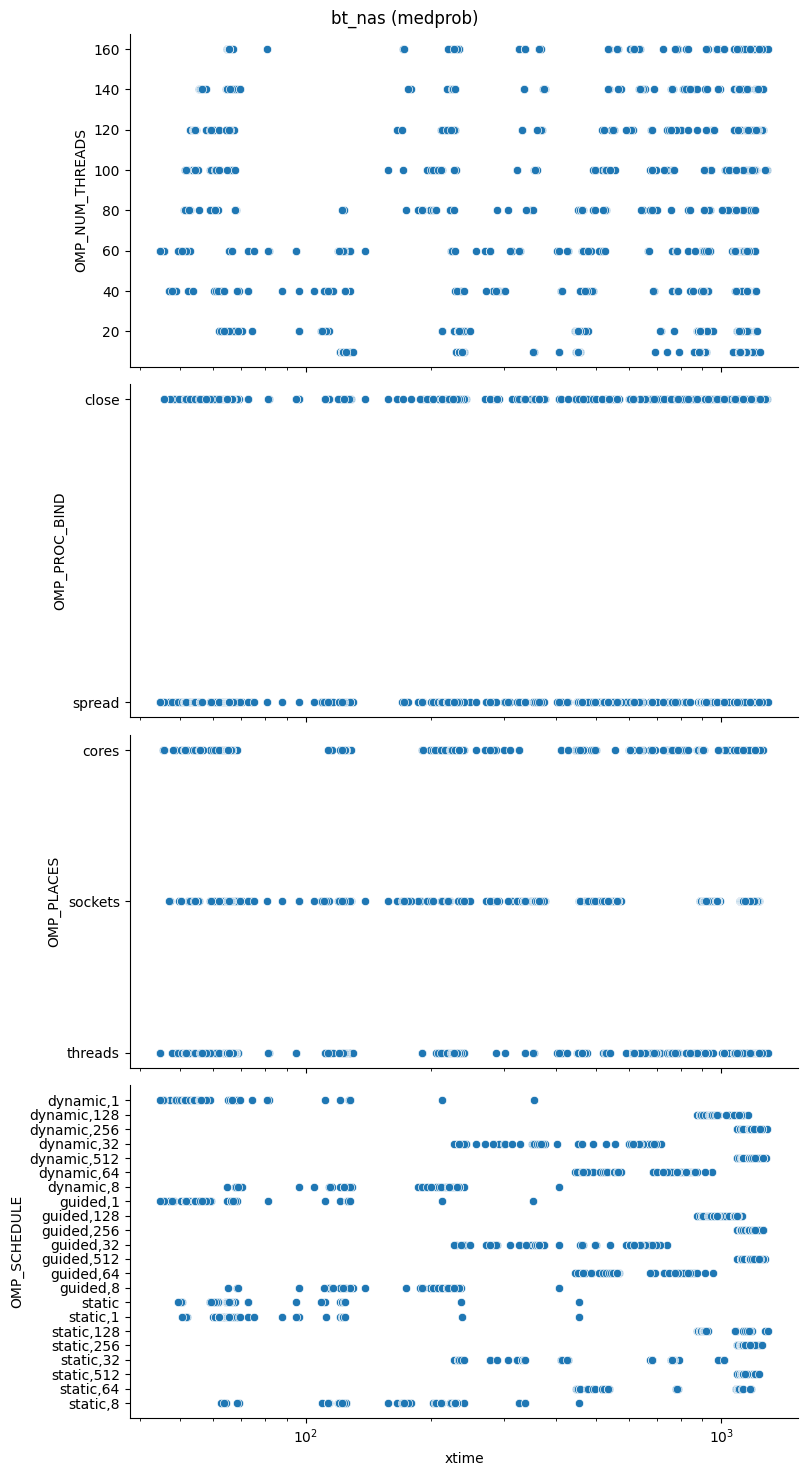

bt_nas smlprob
best xtimes
   OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE      xtime
0               60        spread    threads    dynamic,1  10.933333
1               60        spread    threads     guided,1  11.093333
2               60         close      cores    dynamic,1  11.233333
3               60        spread      cores     guided,1  11.280000
4               60         close      cores     guided,1  11.296667
5               60        spread      cores    dynamic,1  11.306667
6              100        spread    threads       static  11.310000
7              100        spread    threads     static,1  11.330000
8               40         close    sockets     guided,1  11.366667
9              100         close      cores     static,1  11.490000
worst xtimes
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE       xtime
1178              160        spread    threads   guided,256  386.246667
1179              160        spread      cores   guided,128  386.266

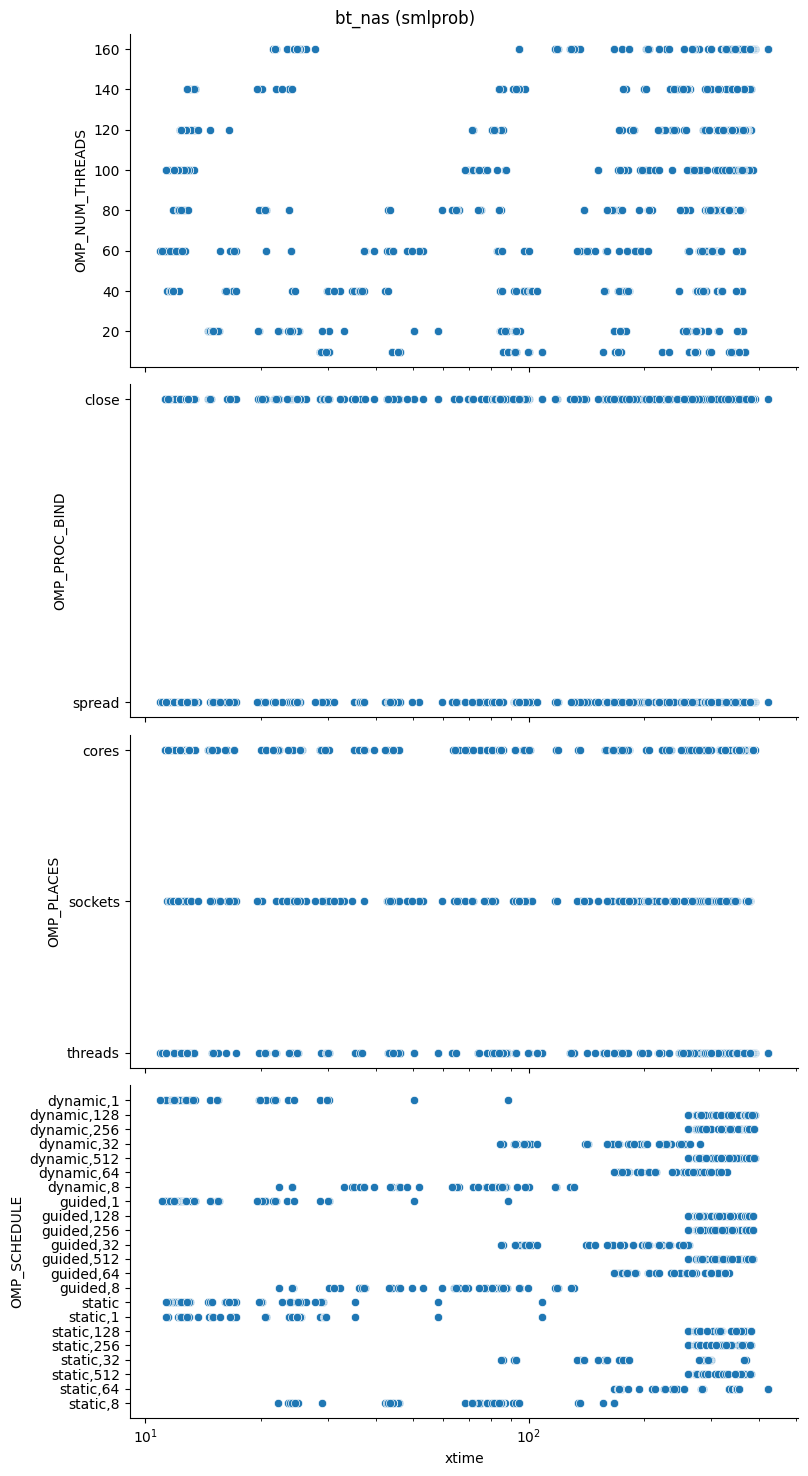

cfd_rodinia lrgprob
best xtimes
   OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE      xtime
0              140         close      cores       static  25.258167
1              140        spread    threads       static  25.305233
2              140        spread      cores       static  25.314433
3              140         close    threads       static  25.348700
4              120        spread      cores       static  28.543533
5              120         close      cores       static  28.603433
6              120        spread    threads       static  28.819967
7              120         close    threads       static  28.924500
8              140         close    threads     static,8  29.244800
9              140        spread      cores     static,8  29.340300
worst xtimes
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE  xtime
1178              160        spread    threads   guided,512  600.0
1179              160         close    threads   static,512  600.0
1180  

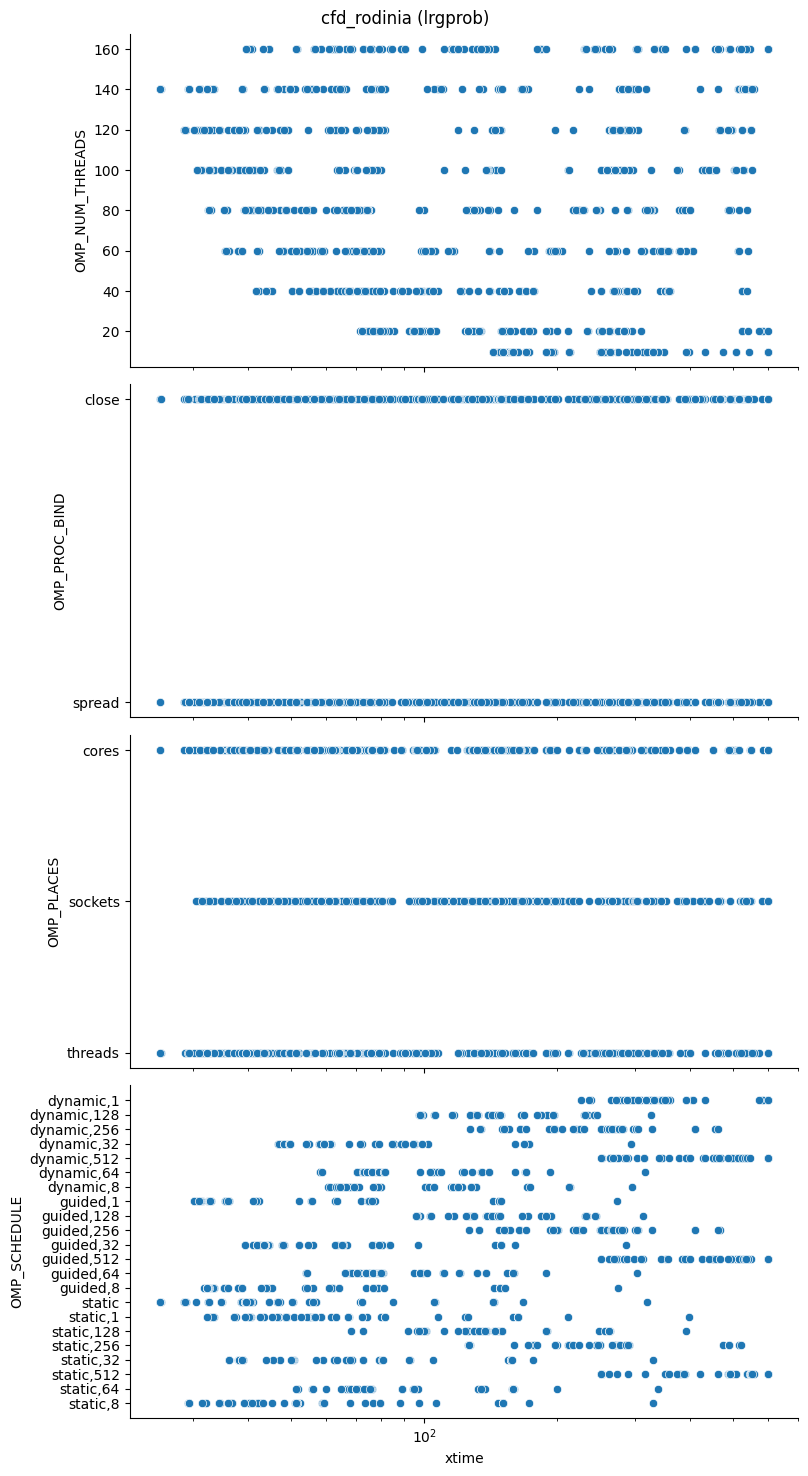

cfd_rodinia medprob
best xtimes
   OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE      xtime
0              140         close    threads       static  11.892033
1              140        spread      cores       static  11.893900
2              140        spread    threads       static  11.900367
3              140         close      cores       static  12.163433
4              120         close    sockets       static  13.755533
5              120         close      cores       static  13.845200
6              120        spread      cores       static  13.890633
7              120        spread    threads       static  13.915133
8              120         close    threads       static  14.178267
9              120        spread    sockets       static  14.188533
worst xtimes
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE       xtime
1178              160        spread      cores  dynamic,512  636.243333
1179              160        spread      cores   guided,512  63

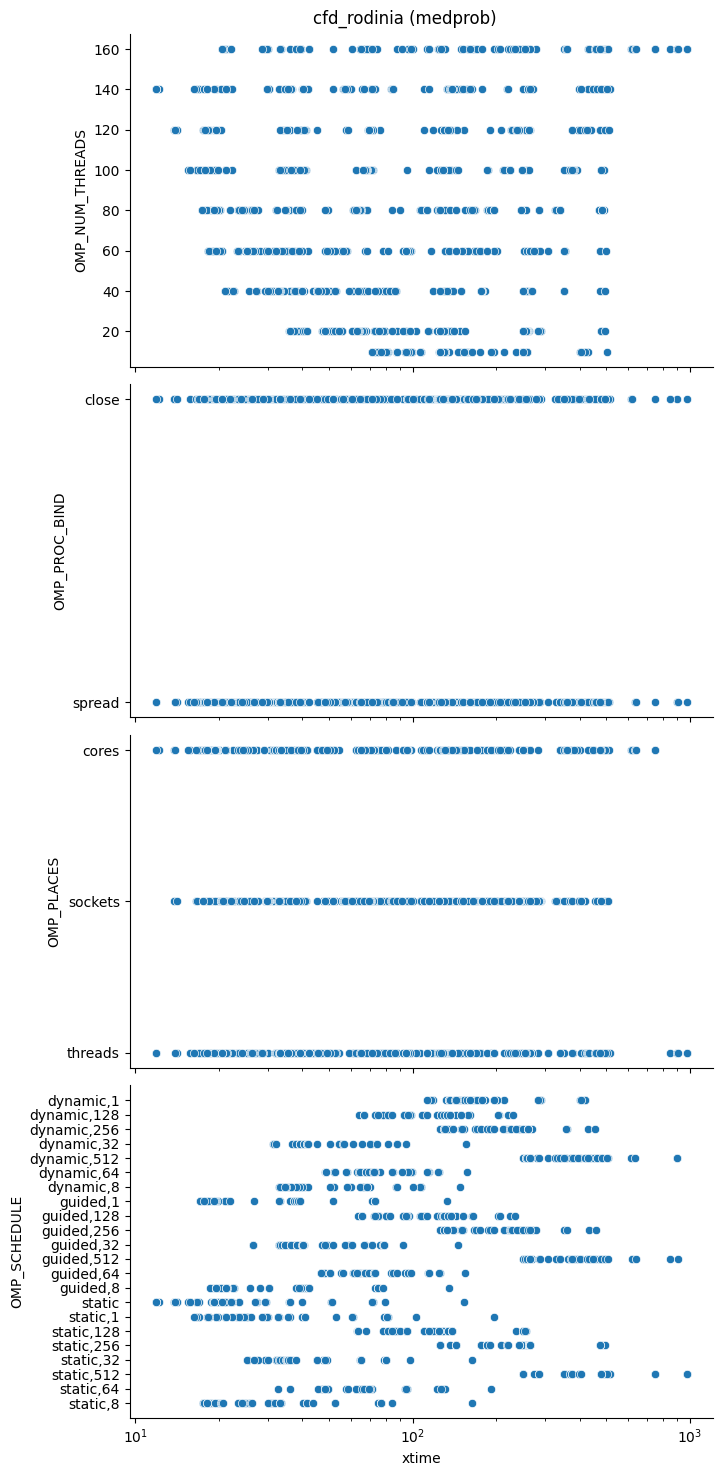

cfd_rodinia smlprob
best xtimes
   OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE     xtime
0              120        spread      cores       static  3.950567
1              120         close      cores       static  3.958107
2              140         close    threads       static  3.975083
3              140         close      cores       static  3.977427
4              140        spread    threads       static  3.980153
5              140        spread      cores       static  3.986597
6              100        spread    threads       static  4.143897
7              120        spread    threads       static  4.152043
8              100        spread      cores       static  4.170663
9              100         close      cores       static  4.173087
worst xtimes
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE       xtime
1178              160        spread      cores   static,512  302.981667
1179              160        spread      cores  dynamic,512  303.263000
11

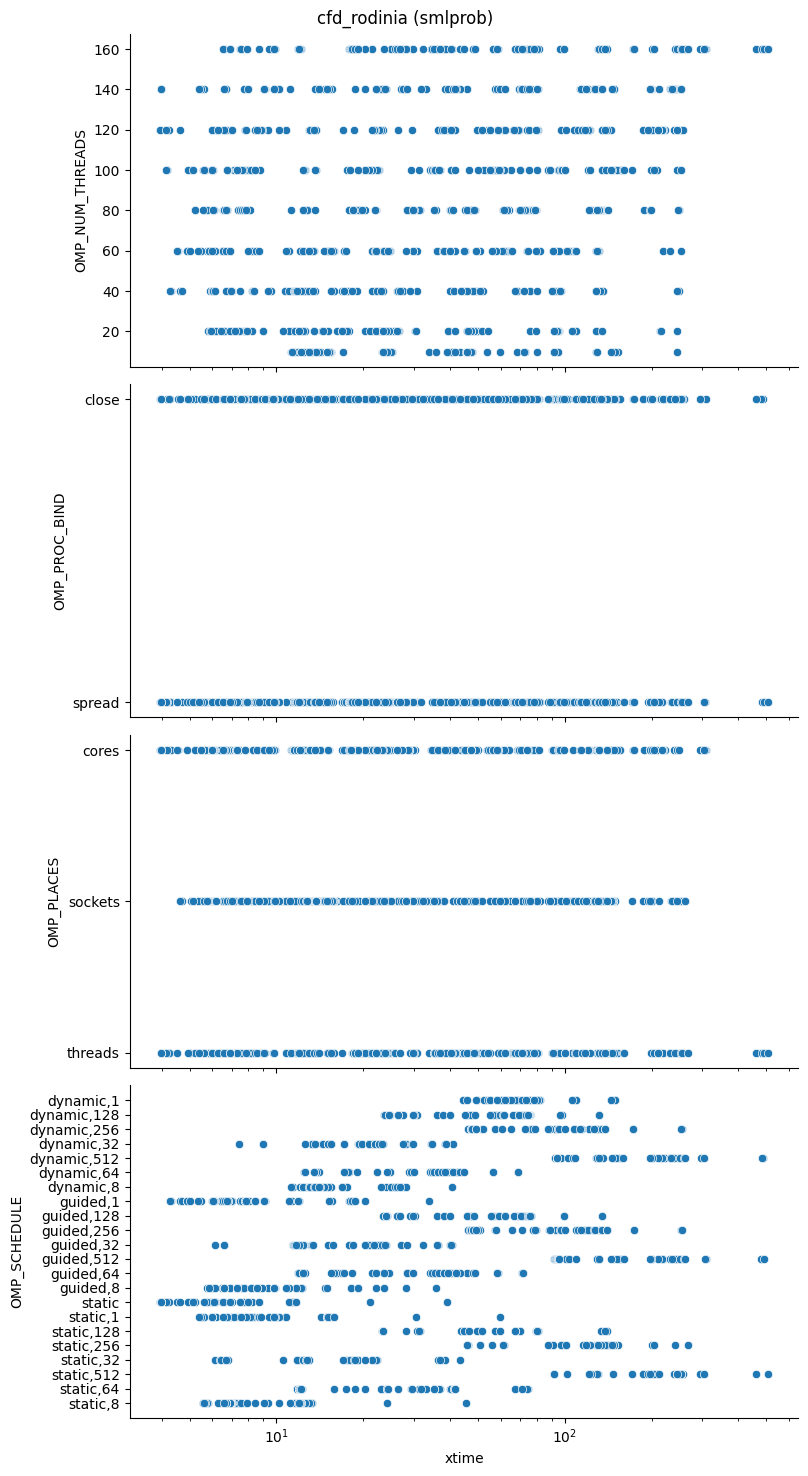

cg_nas lrgprob
best xtimes
   OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE       xtime
0              140         close      cores       static  326.336667
1              140        spread    threads       static  327.110000
2              140         close    threads       static  327.893333
3              140         close      cores   static,256  331.690000
4              140        spread    threads   static,512  331.920000
5              140        spread      cores   static,128  332.096667
6              140        spread      cores   static,512  332.443333
7              140        spread    threads    static,32  332.576667
8              140        spread    threads   static,128  333.600000
9              140         close    threads   static,512  334.196667
worst xtimes
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE        xtime
1178               10        spread    threads    dynamic,1  3320.350000
1179               10         close    threads    dynam

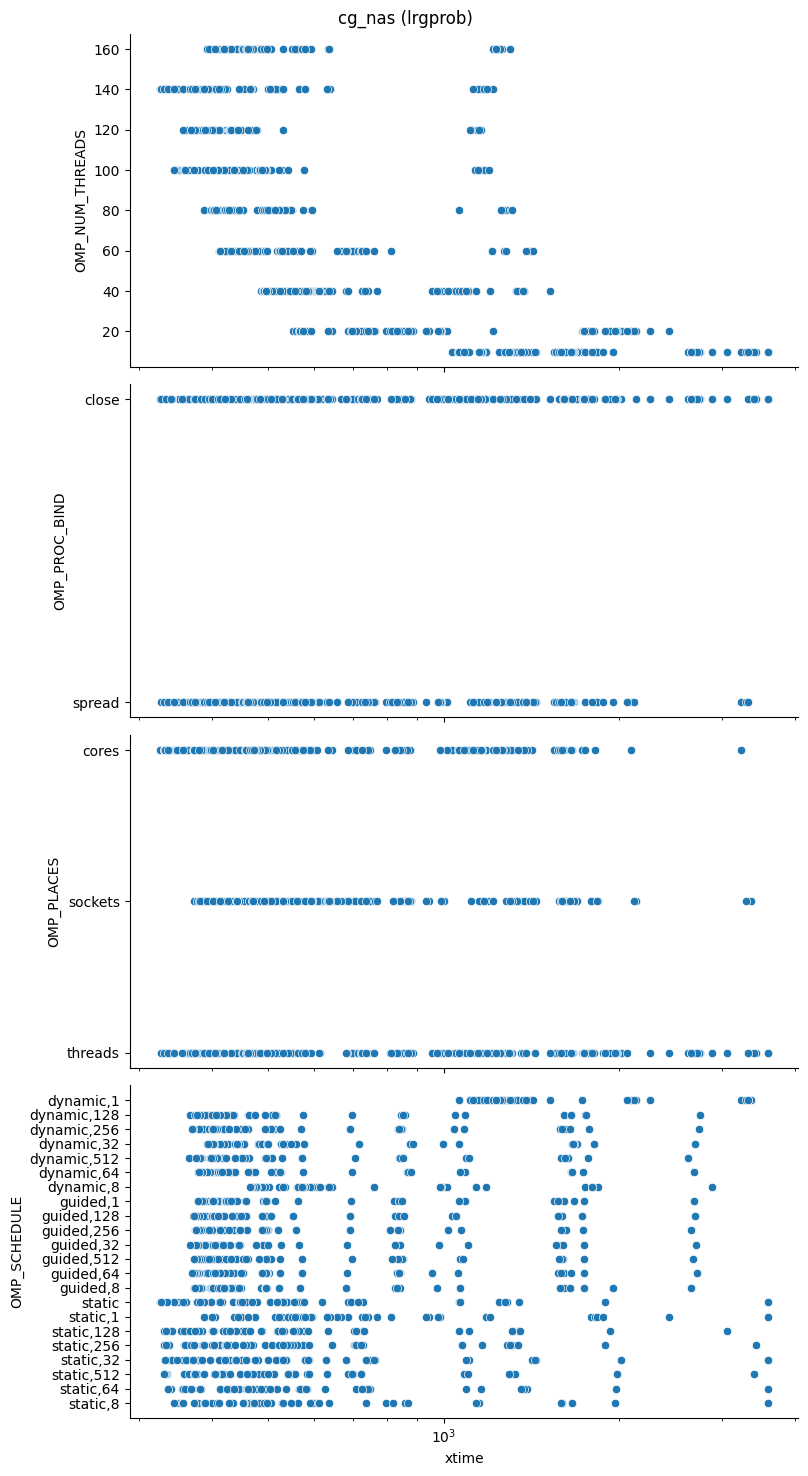

cg_nas medprob
best xtimes
   OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE     xtime
0              140        spread    threads       static  6.483333
1              140         close    threads       static  6.513333
2              140         close      cores       static  6.520000
3              140        spread      cores       static  6.580000
4              140         close      cores    static,64  6.956667
5              140        spread      cores    static,64  6.973333
6              140        spread    threads    static,64  6.980000
7              140        spread      cores   static,128  7.086667
8              140         close    threads    static,64  7.103333
9              100        spread    threads       static  7.126667
worst xtimes
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE       xtime
1178              160         close    threads    dynamic,1  139.850000
1179              160         close      cores    dynamic,1  140.013333
1180   

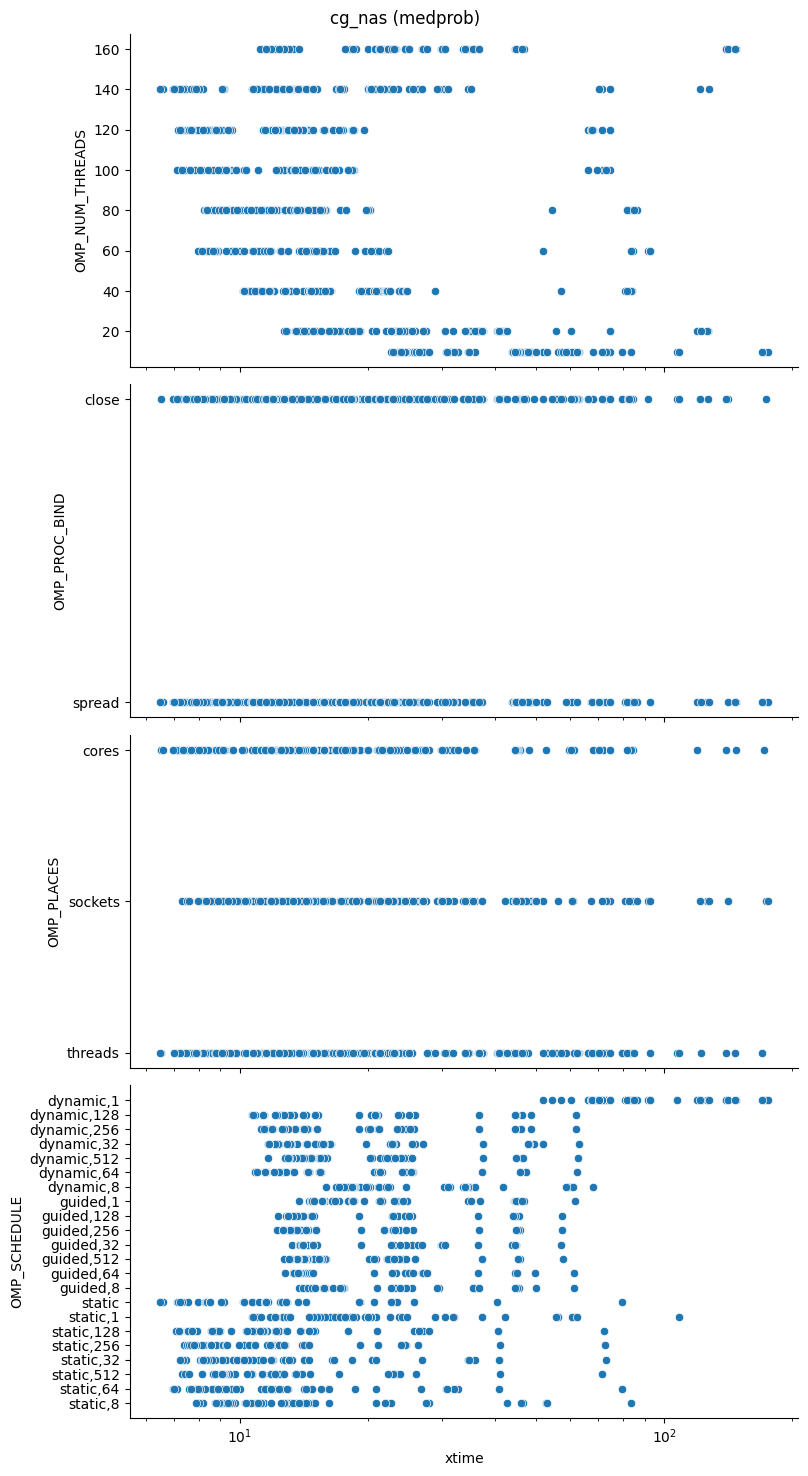

cg_nas smlprob
best xtimes
   OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE     xtime
0              140        spread    threads       static  1.880000
1              140         close    threads       static  1.903333
2              140         close      cores       static  1.913333
3              140        spread      cores       static  1.920000
4              100        spread    threads       static  2.003333
5              100         close      cores       static  2.010000
6              100        spread      cores       static  2.026667
7              140        spread    threads    static,32  2.063333
8              100        spread      cores   static,128  2.083333
9              100         close      cores   static,256  2.086667
worst xtimes
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE      xtime
1178              160        spread    threads    dynamic,1  70.366667
1179              160         close      cores    dynamic,1  70.383333
1180      

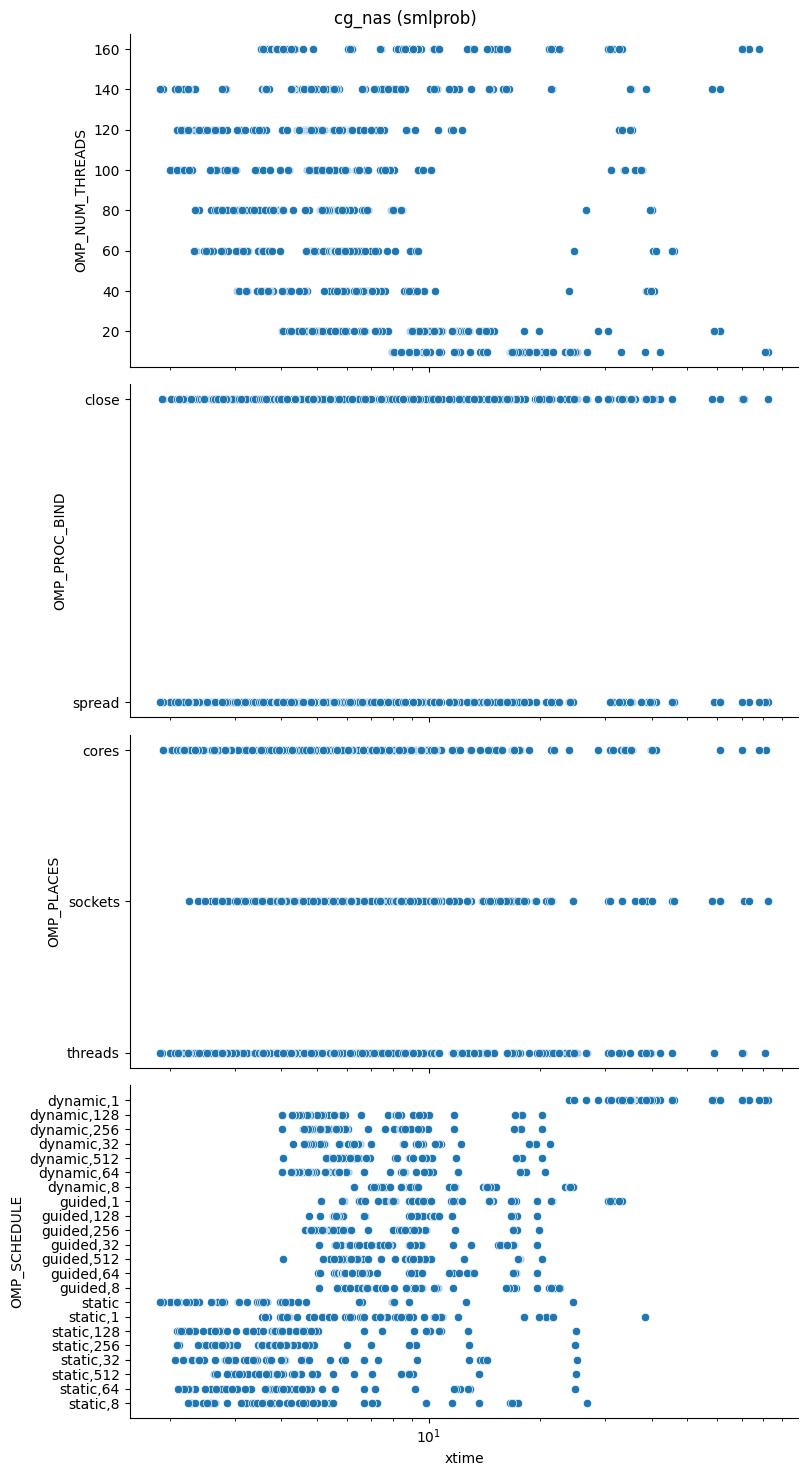

ft_nas lrgprob
best xtimes
   OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE       xtime
0               60        spread      cores     guided,1  155.673333
1               40        spread    sockets     guided,1  156.103333
2               60         close      cores     guided,1  156.613333
3               40         close    sockets     guided,1  156.753333
4               40         close      cores    dynamic,1  157.113333
5               40        spread    sockets    dynamic,1  157.440000
6               40        spread    threads    dynamic,1  157.450000
7               40        spread    threads     guided,1  157.550000
8               40        spread      cores     guided,1  157.683333
9               40        spread      cores    dynamic,1  157.683333
worst xtimes
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE   xtime
1178               20        spread      cores   guided,512  1800.0
1179              100        spread    sockets   guided,512  1800

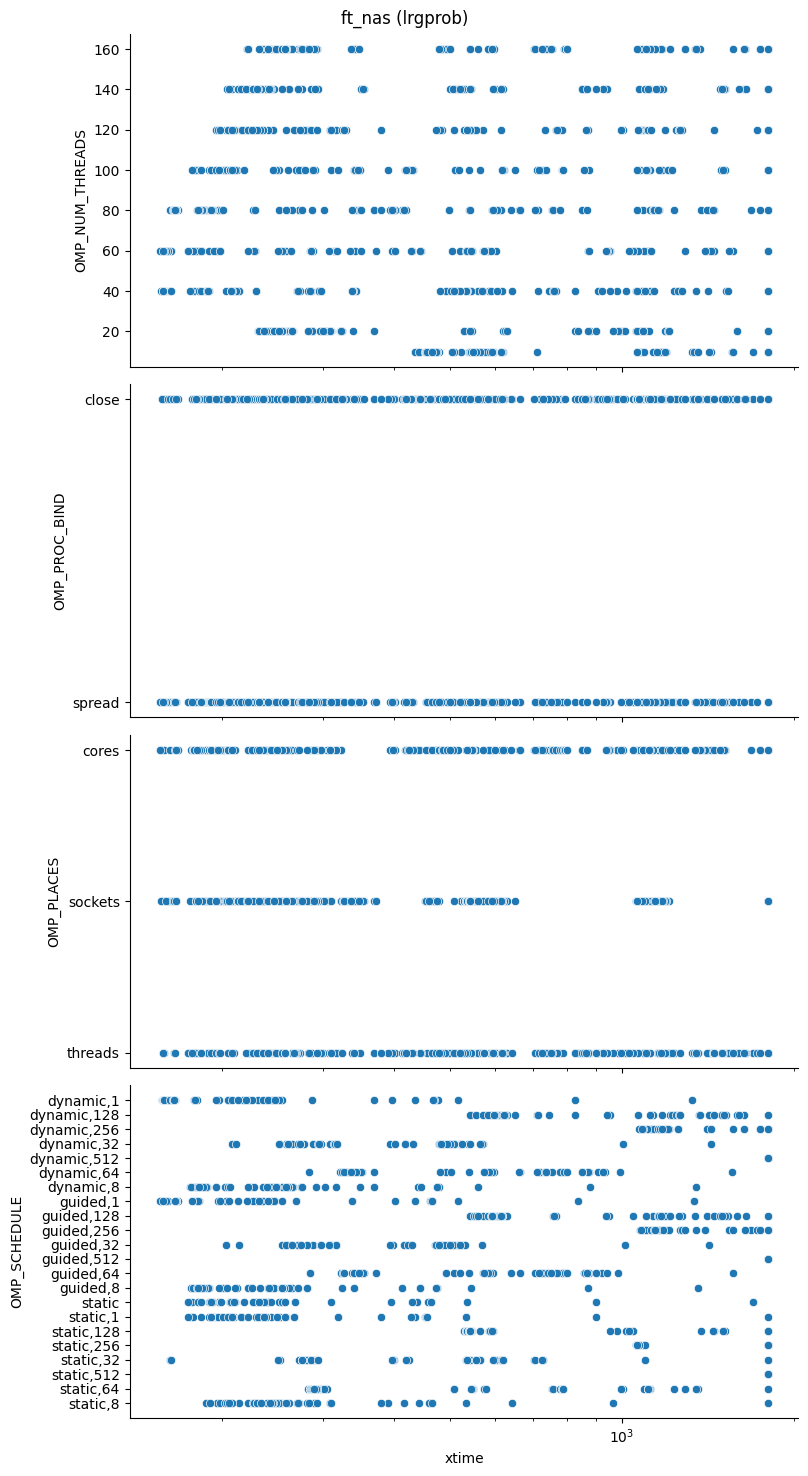

ft_nas medprob
best xtimes
   OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE     xtime
0              100        spread      cores    dynamic,1  7.113333
1              100         close      cores     guided,1  7.123333
2              100        spread    threads     guided,1  7.123333
3              100        spread      cores     guided,1  7.126667
4              100         close      cores    dynamic,1  7.146667
5              100        spread    threads    dynamic,1  7.150000
6               60         close      cores     guided,1  7.170000
7              120        spread    threads    dynamic,1  7.170000
8               80        spread      cores    dynamic,1  7.173333
9               60        spread      cores     guided,1  7.176667
worst xtimes
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE       xtime
1178              160        spread      cores   guided,512  219.533333
1179              100         close    threads  dynamic,512  219.733333
1180   

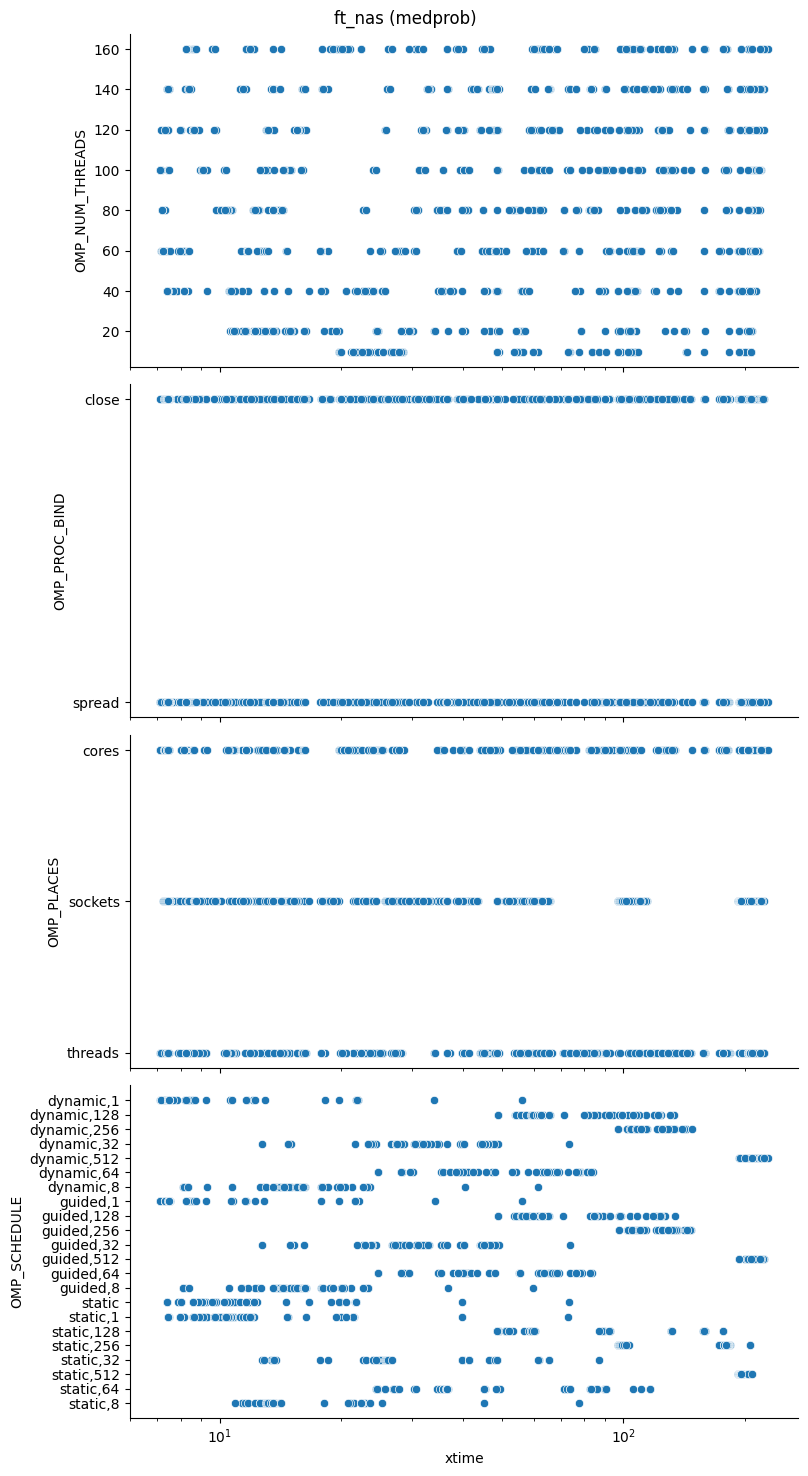

ft_nas smlprob
best xtimes
   OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE     xtime
0              140        spread    threads       static  1.730000
1              140         close    threads     static,1  1.730000
2              140        spread    threads     static,1  1.733333
3              140         close    threads       static  1.740000
4              140        spread      cores     static,1  1.743333
5               60        spread      cores     guided,1  1.750000
6              140         close      cores     static,1  1.753333
7               60         close      cores    dynamic,1  1.753333
8               60         close      cores     guided,1  1.753333
9               60        spread    threads     guided,1  1.753333
worst xtimes
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE      xtime
1178              160        spread    sockets   guided,512  60.840000
1179              160        spread    threads   guided,512  60.900000
1180      

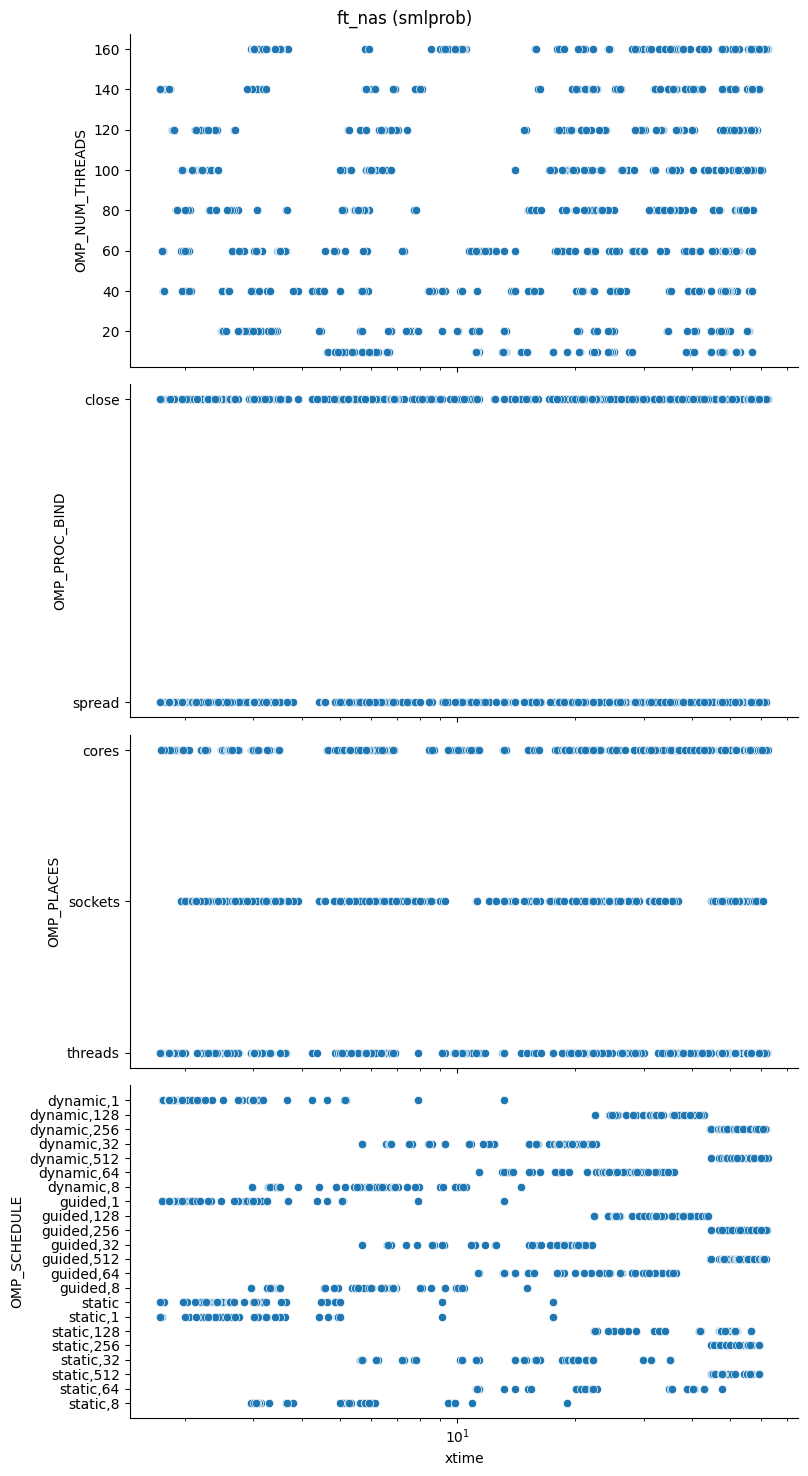

hpcg lrgprob
best xtimes
   OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE      xtime
0               20         close      cores       static  83.665033
1               20         close      cores   static,512  84.135200
2               20         close      cores   guided,512  84.159667
3               20         close      cores   static,256  84.518133
4               20         close      cores    static,64  84.660000
5               20         close      cores     guided,1  84.784300
6               20         close      cores   guided,256  84.857867
7               20         close      cores   static,128  84.927900
8               20         close      cores    guided,32  84.986167
9               20         close      cores    guided,64  85.077067
worst xtimes
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE  xtime
1178              100        spread    threads     static,1  600.0
1179              120         close      cores    dynamic,1  600.0
1180         

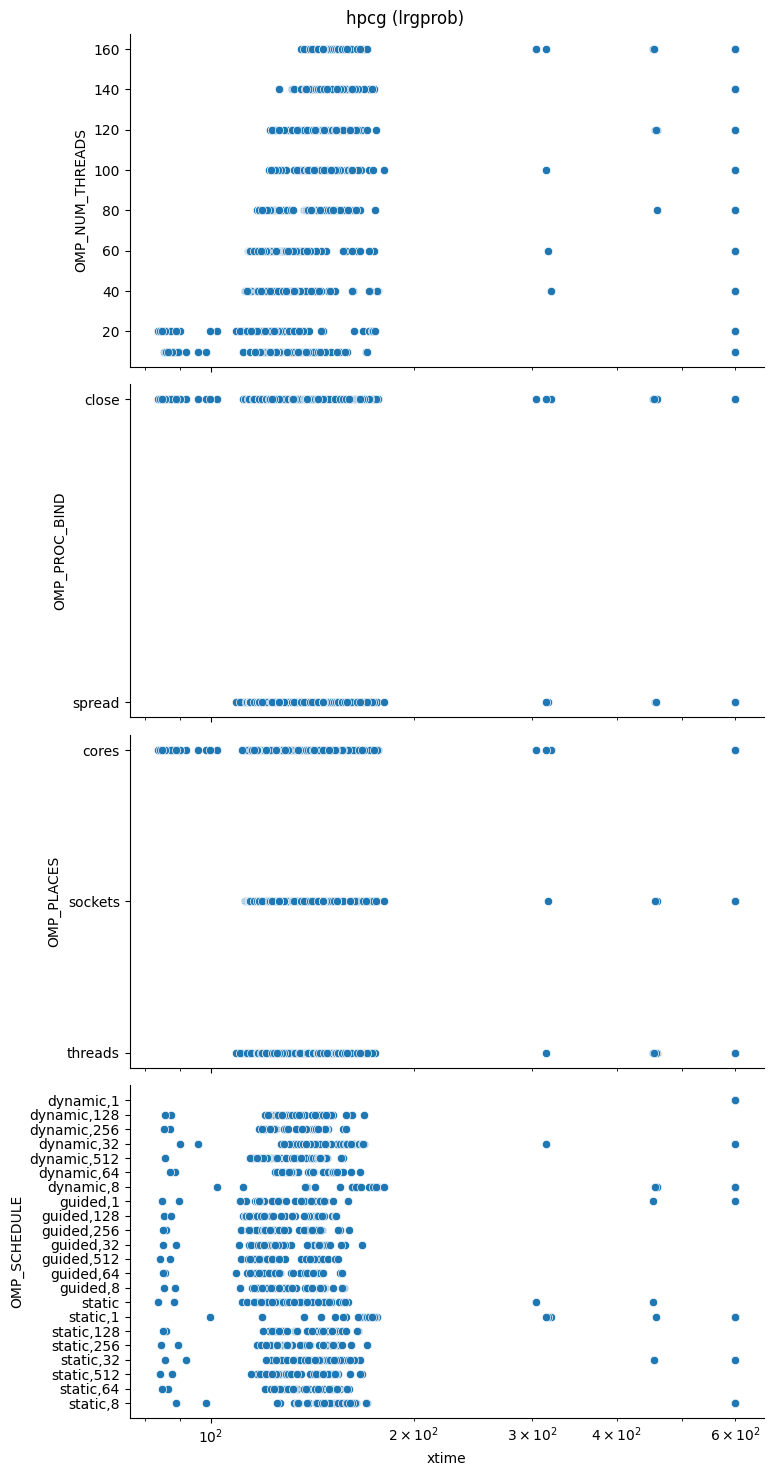

hpcg medprob
best xtimes
   OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE      xtime
0               10         close      cores   guided,512  29.378233
1               10         close      cores   guided,128  29.409800
2               10         close      cores   guided,256  30.465133
3               10         close      cores  dynamic,128  31.654200
4               10         close      cores  dynamic,512  32.042267
5               20         close      cores  dynamic,128  32.308133
6               10         close      cores  dynamic,256  32.370500
7               10         close      cores    static,64  32.797767
8               20         close      cores  dynamic,512  32.845900
9               20         close      cores  dynamic,256  33.366667
worst xtimes
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE  xtime
1178              100         close      cores    static,32  180.0
1179              100         close      cores   static,512  180.0
1180         

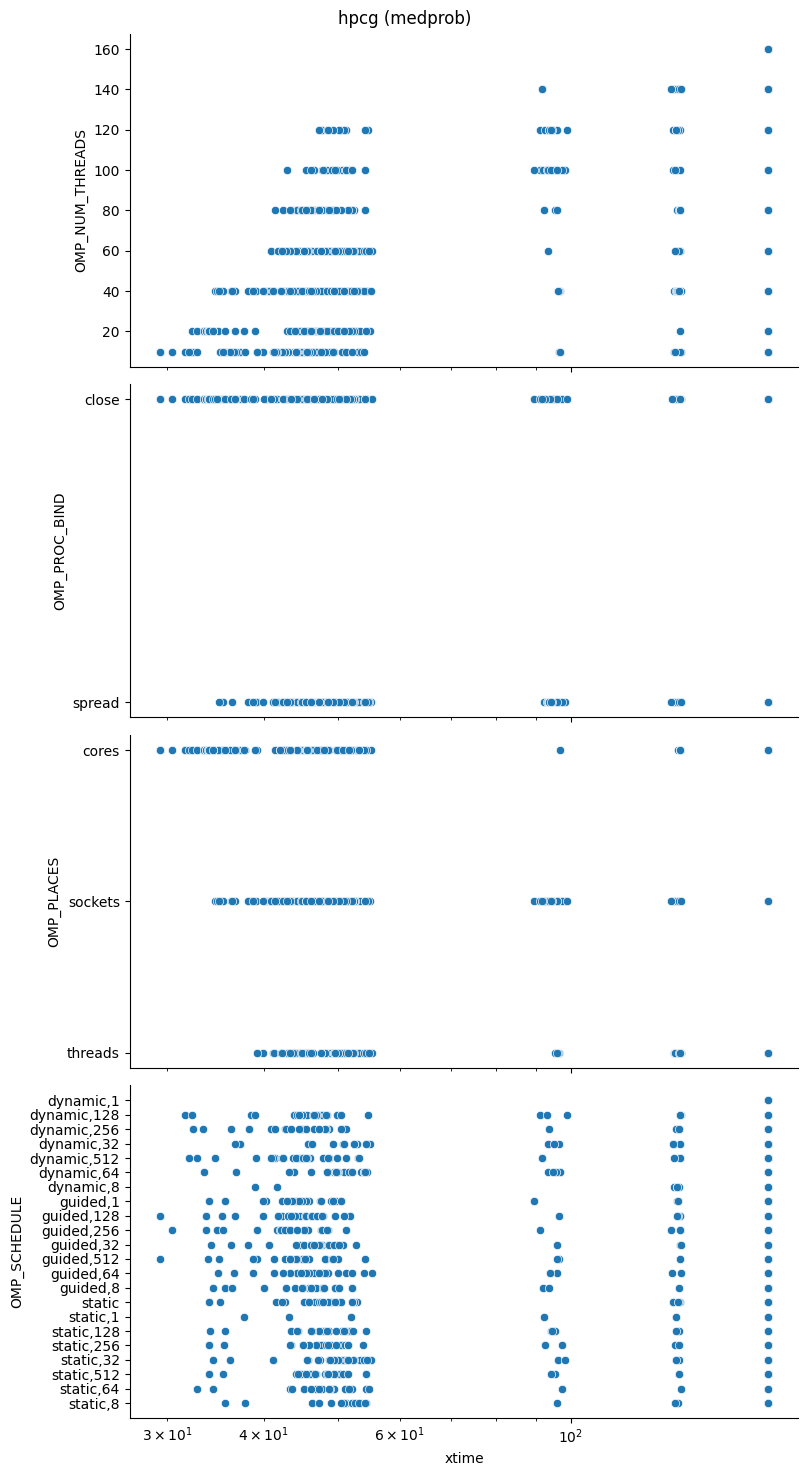

hpcg smlprob
best xtimes
   OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE     xtime
0               20         close      cores       static  2.260633
1               20         close      cores   static,512  2.275587
2               20         close      cores   guided,256  2.286493
3               20         close      cores     guided,1  2.286580
4               20         close      cores   static,256  2.292827
5               20         close      cores   guided,512  2.303277
6               20         close      cores    guided,32  2.305770
7               20         close      cores   static,128  2.306590
8               20         close      cores     guided,8  2.308227
9               20         close      cores   guided,128  2.319877
worst xtimes
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE  xtime
1178              140         close      cores   dynamic,64   60.0
1179              140         close      cores  dynamic,512   60.0
1180              140   

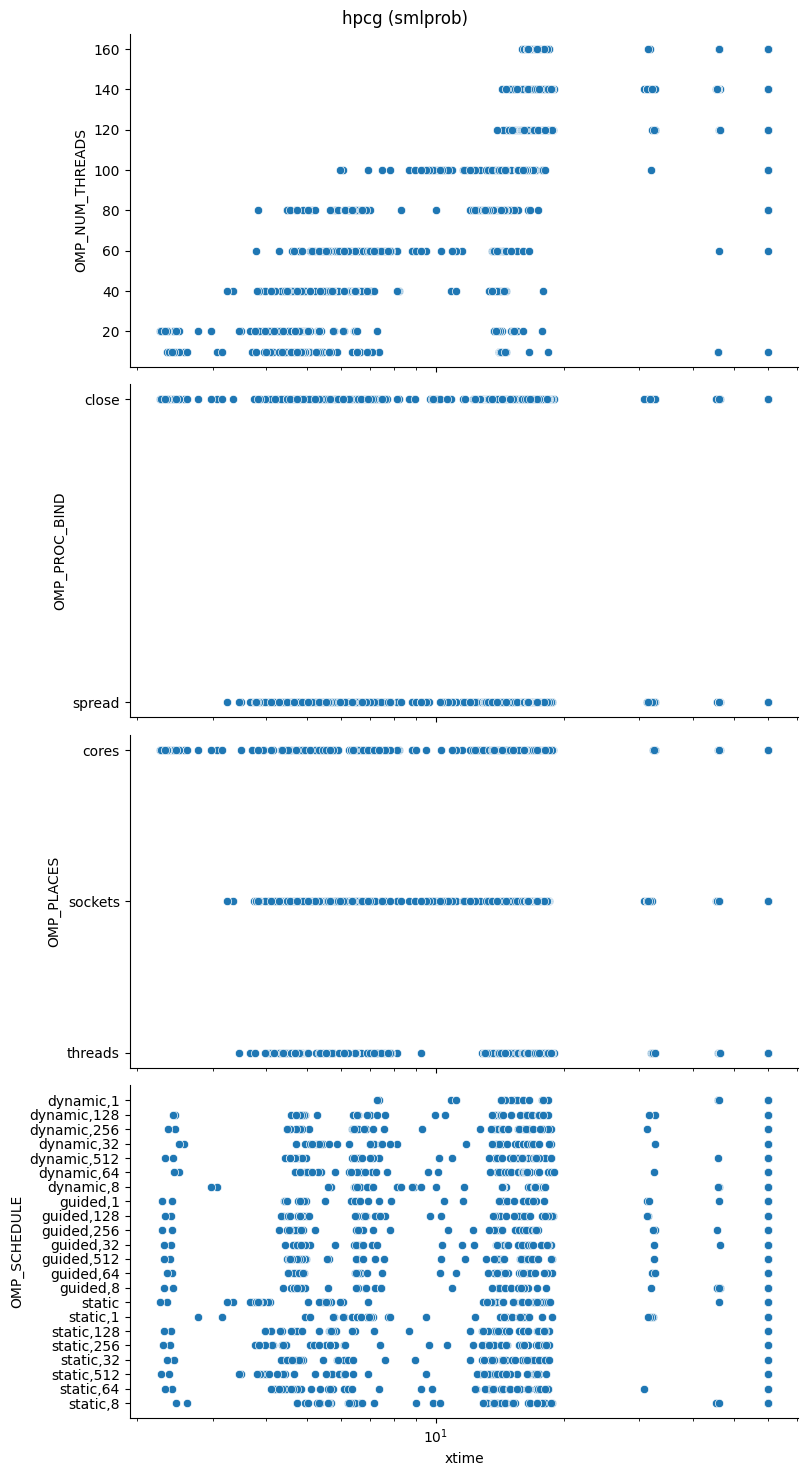

lulesh lrgprob
best xtimes
   OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE      xtime
0               20         close      cores       static  16.732118
1               20         close      cores   static,256  18.680161
2               20         close      cores   static,128  19.118010
3               20         close      cores   static,512  20.234857
4               20         close      cores    static,64  20.725800
5               10         close      cores       static  20.837073
6               20         close      cores   guided,256  21.617302
7               20         close      cores  dynamic,256  22.702358
8               20         close      cores    static,32  22.818797
9               20         close      cores   guided,512  23.120955
worst xtimes
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE  xtime
1178              100         close      cores    dynamic,1  600.0
1179               80        spread    threads     guided,1  600.0
1180       

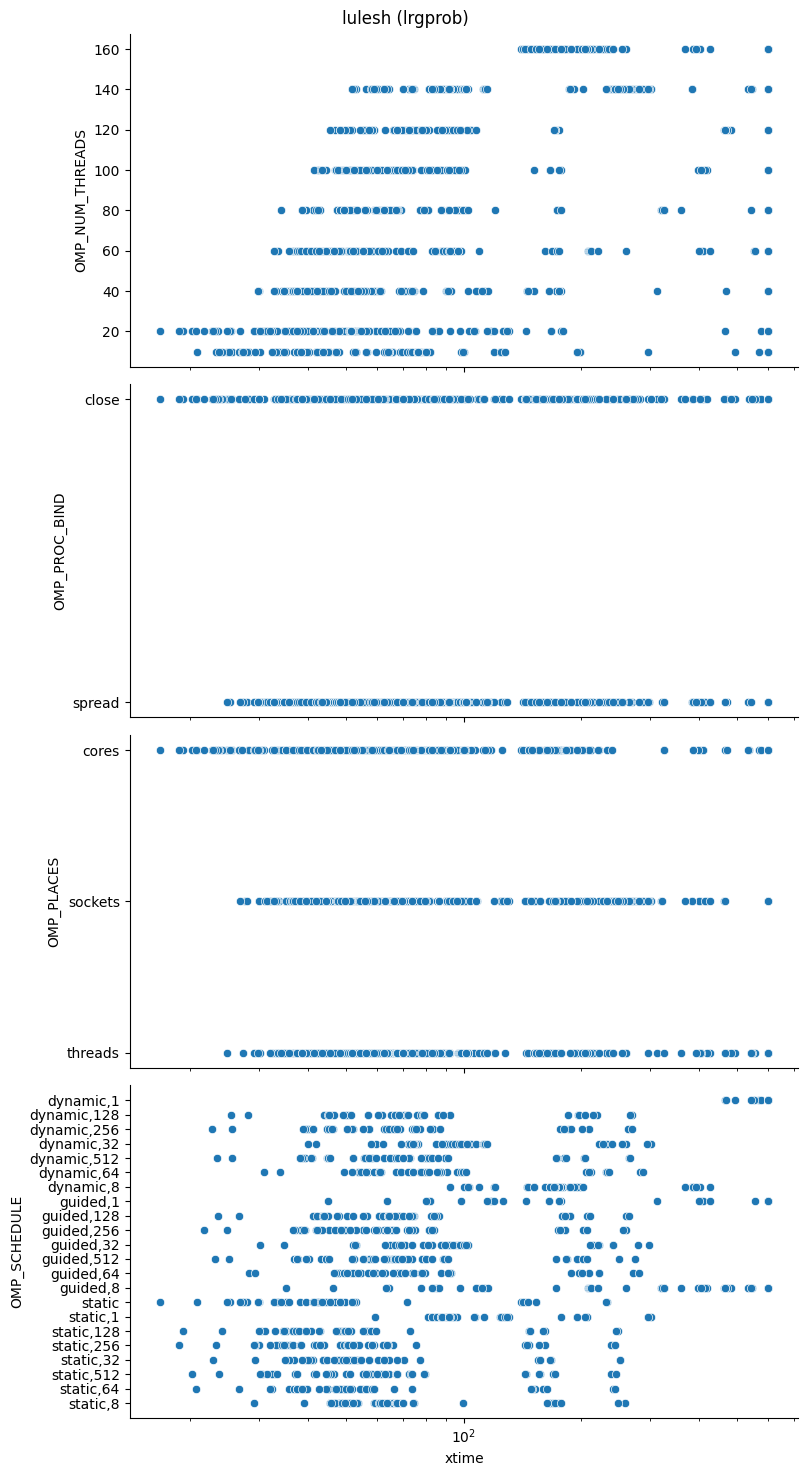

lulesh medprob
best xtimes
   OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE      xtime
0               10         close      cores       static  11.485089
1               20         close      cores       static  11.961798
2               10         close      cores   static,128  12.610770
3               10         close      cores   static,256  12.830553
4               10         close      cores    static,64  12.949288
5               20         close      cores    static,64  12.951512
6               20         close      cores   static,128  13.420771
7               20         close      cores    static,32  13.658823
8               20         close      cores   static,256  13.731494
9               10         close      cores    static,32  13.943859
worst xtimes
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE        xtime
1178              140         close    threads     guided,1   880.361870
1179              140        spread      cores     guided,1   881.

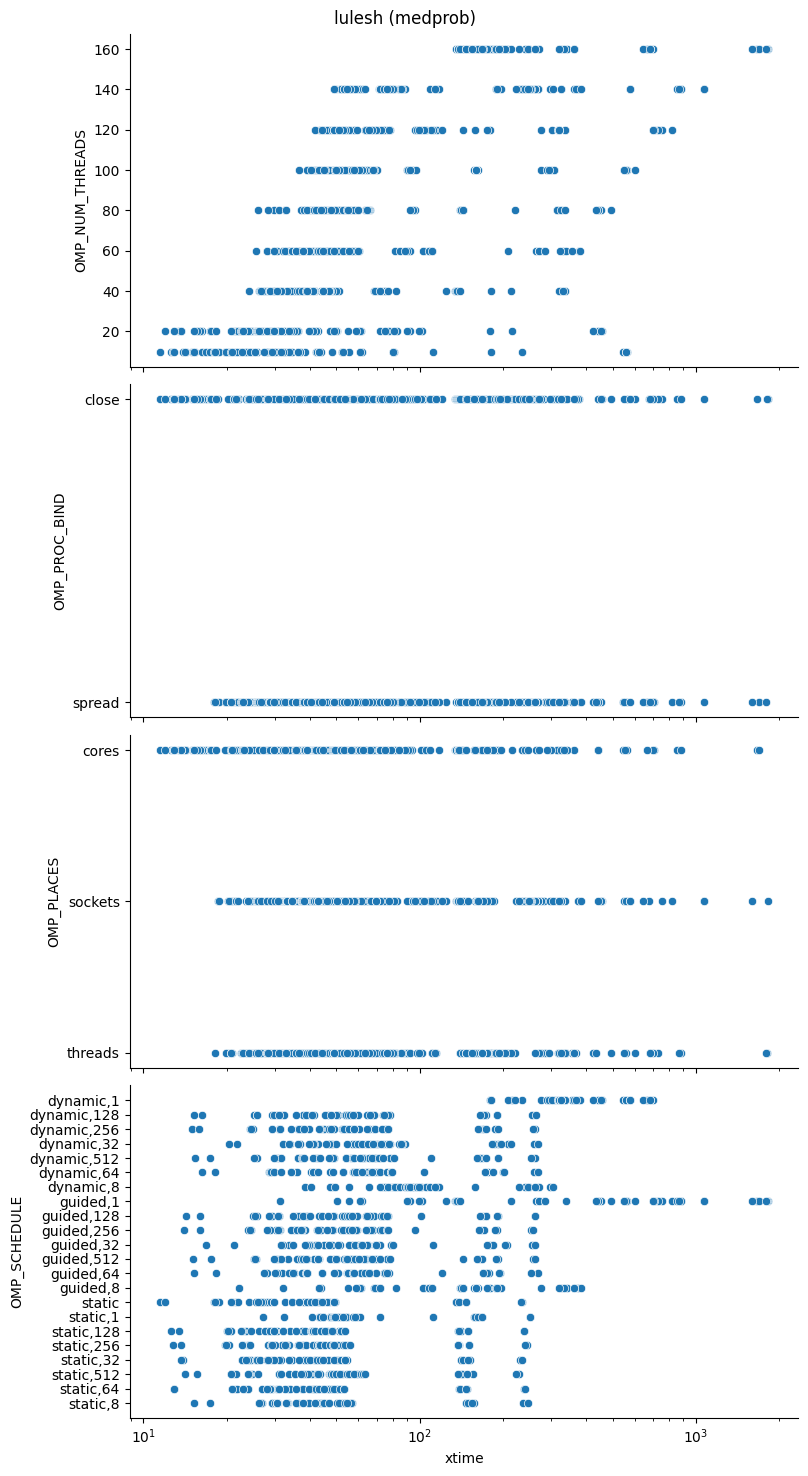

lulesh smlprob
best xtimes
   OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE     xtime
0               10         close      cores       static  7.921444
1               10         close      cores   static,128  7.952766
2               10         close      cores    static,64  7.954915
3               10         close      cores    static,32  8.058097
4               10         close      cores   static,256  8.095029
5               10         close      cores   static,512  8.615125
6               10         close      cores     static,8  8.798600
7               10         close      cores   guided,128  9.048531
8               10         close      cores  dynamic,128  9.103525
9               10         close      cores   guided,256  9.134291
worst xtimes
      OMP_NUM_THREADS OMP_PROC_BIND OMP_PLACES OMP_SCHEDULE       xtime
1178              160        spread    threads    dynamic,1  307.511013
1179              140        spread    sockets    dynamic,1  308.206040
1180   

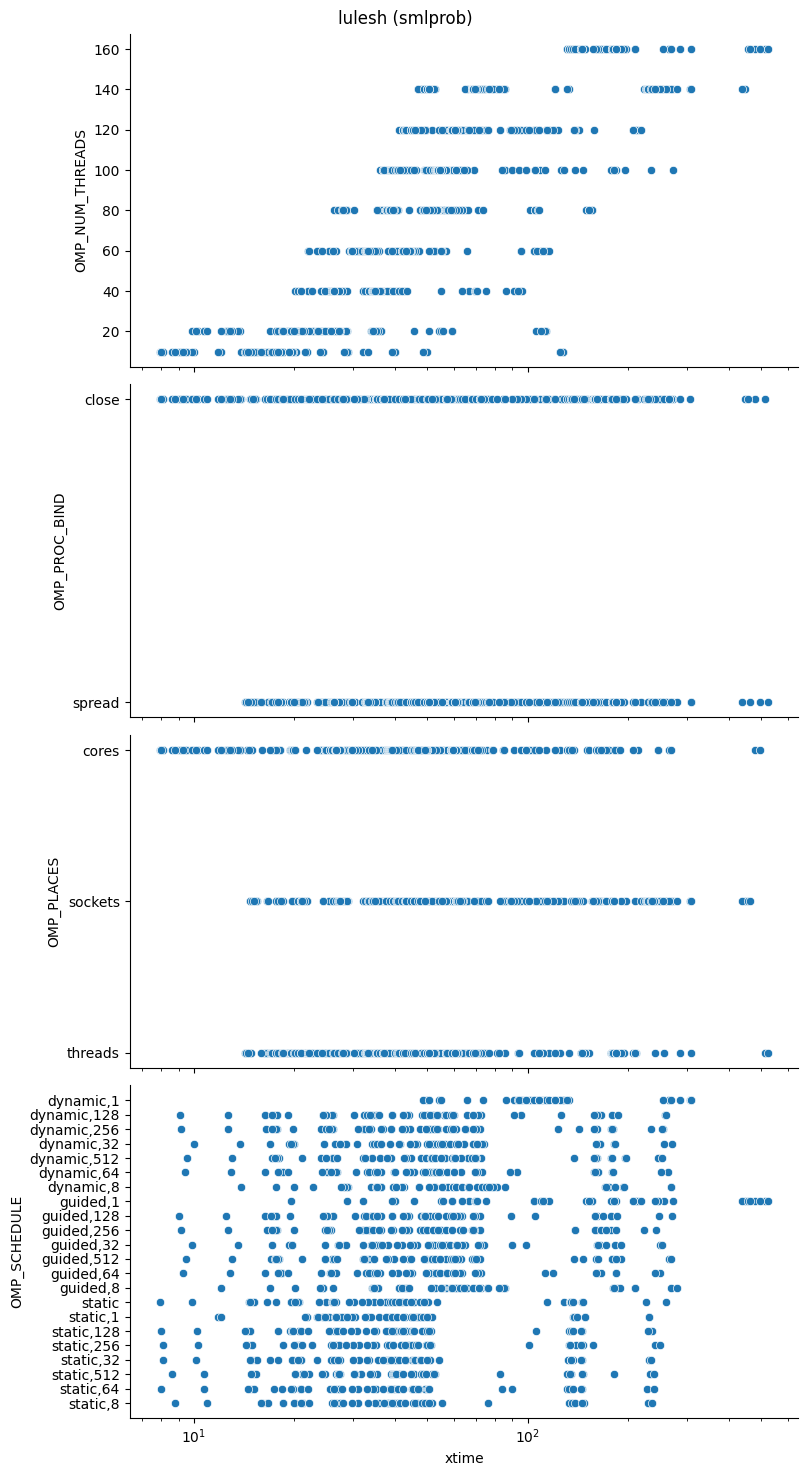

In [8]:
# for each complete run, let's plot the data

for key,values in doneRuns.items():
	progname = values['progname']
	probsize = values['probsize']
	df = values['df'].copy(deep=True)

	# drop any -1 values
	df = df[df['xtime'] != -1.0]

	# drop the progname and probsize columns
	df = df.drop(columns=['progname', 'probsize'])

	#print(df.head(), df.shape)

	hparams = list(df.columns)
	hparams.remove('xtime')

	# average out the xtimes
	avrgd = df.groupby(hparams).mean().reset_index()

	print(progname, probsize)

	# best xtime configs
	bestXtimes = avrgd.sort_values(by=['xtime']).reset_index(drop=True)
	print('best xtimes')
	print(bestXtimes.iloc[:10])

	print('worst xtimes')
	print(bestXtimes.iloc[-10:])

	# print the best static xtimes
	print('best static xtimes')
	print(bestXtimes[bestXtimes['OMP_SCHEDULE'] == 'static'].reset_index(drop=True).iloc[0:4])

	# get the best xtime, pull up it's static result
	print(avrgd[(avrgd['OMP_NUM_THREADS'] == 160) & (avrgd['OMP_SCHEDULE'] == 'static')])

	# let's create multiple 2D plots of the xtimes
	pp = sns.pairplot(avrgd, y_vars=hparams, x_vars=['xtime']) 
	pp.fig.set_size_inches(15,15)
	pp.fig.suptitle(progname+' ('+probsize+')', x=0.7, y=0.999)

	for ax in pp.axes.flat:
		if ax.get_ylabel() in hparams:
			ax.set(xscale='log')

	plt.show()


	
	
